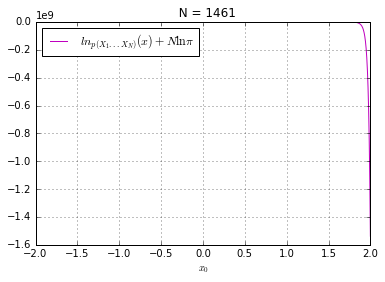

max_log(y) =-0.734


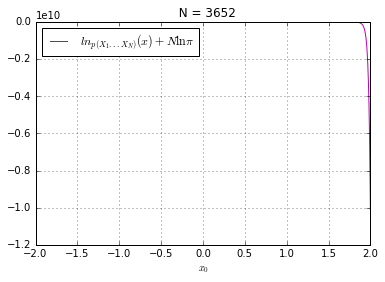

max_log(y) =-0.94


In [11]:
import math
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline


tetta = 1
bounds = [-2, 2]
step = 10**(-3)
new_range = np.arange(bounds[0], bounds[1] + step, step)

max_logy = 0
maxF = float("-Inf")
weibull_file = 'weibull.txt'
X = []

f = open(weibull_file) 
X = [float(line[:-1]) for line in f]

def log_likelihood_func(X, logy): 
    global max_logy
    global maxF
    
    sum_xy = 0
    sum_logx  = 0    
    
    y = 10 ** logy
    res = 0.0
    for x in X:
        sum_xy += x ** y
        sum_logx += math.log(x)
        
    res += math.log(y)
    res -= sum_xy
    res += (y-1)*sum_logx
    if (res > maxF):
        maxF = res
        max_logy = logy
    return res

def plot_likelihood(X):
    Func_arr = []
    Func_arr += [log_likelihood_func(X, logy) for logy in new_range]
    y_range = [new_range[i] for i in range(len(new_range))]
    plt.plot(y_range, Func_arr ,'m', label = r'$ln_{p(X_{1}...X_{N})}(x) + N \ln \pi$')
    plt.title('  N = ' + str(len(X)))
    plt.xlabel(r'$x_{0}$')
    plt.legend(loc = 'best')
 
    plt.grid(True)
    plt.show()
    
plot_likelihood(X[0:round(1461):])
print('max_log(y) =' + str(max_logy))

max_logy = 0
maxF = float("-Inf")
    
plot_likelihood(X)
print('max_log(y) =' + str(max_logy))

#экстремумы достигаются в одной точке.